# New Section

In [1]:
# Import packages and modules
import pandas as pd
import numpy as np

from datetime import datetime, timedelta
from datetime import datetime
from dateutil import parser
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import dates as mpl_dates
import seaborn as sns
import time

from collections import Counter

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

import spacy
from collections import Counter
from spacy.symbols import IS_PUNCT
from spacy.lang.en import EnglishDefaults
from statistics import median
nltk.download('wordnet')

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
!pip install swifter
import swifter

In [3]:
# Read in the df from TJCapstone--NLP--Prep.ipynb
df_text = pd.read_csv('docs_clean.csv')
df_text

,date,synopsis,group_count,topic,agencies,text_url
0,2008-08-08,This final rule updates the payment rates used...,18,Health facilities; Kidney diseases; Medicare; ...,Health and Human Services Department; Centers ...,https://www.federalregister.gov/documents/full...
1,2008-08-11,General Services Acquisition Regulation; GSAR ...,21,Income taxes; Reporting and recordkeeping requ...,General Services Administration;Health and Hum...,https://www.federalregister.gov/documents/full...
2,2008-08-12,"We, the U.S. Fish and Wildlife Service (Servic...",25,Administrative practice and procedure; Flood i...,Interior Department; Fish and Wildlife Service...,https://www.federalregister.gov/documents/full...
3,2008-08-13,The General Services Administration (GSA) is p...,28,Grant programs-health; Health facilities; Heal...,General Services Administration;Health and Hum...,https://www.federalregister.gov/documents/full...
4,2008-08-14,"We, the U.S. Fish and Wildlife Service (we or ...",19,Freedom of information; Reporting and recordke...,Interior Department; Fish and Wildlife Service...,https://www.federalregister.gov/documents/full...
...,...,...,...,...,...,...
1969,2016-06-27,The Coast Guard announces a public meeting to ...,31,Brokers; Reporting and recordkeeping requireme...,Homeland Security Department; Coast Guard;Secu...,https://www.federalregister.gov/documents/full...
1970,2016-06-28,The Coast Guard proposes to establish a tempor...,40,Harbors; Marine safety; Navigation (water); Re...,Homeland Security Department; Coast Guard;Inte...,https://www.federalregister.gov/documents/full...
1971,2016-06-29,"In January 2011, NMFS implemented the trawl ra...",25,Fisheries; FishingAirspace; Navigation (air)Fi...,Commerce Department; National Oceanic and Atmo...,https://www.federalregister.gov/documents/full...
1972,2016-06-30,The Environmental Protection Agency (EPA) is p...,54,Air pollution control; Carbon monoxide; Enviro...,Environmental Protection Agency;Environmental ...,https://www.federalregister.gov/documents/full...


In [4]:
# Set date column as a DateTime object
df_text['date'] = pd.to_datetime(df_text['date'])
df_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1974 entries, 0 to 1973
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1974 non-null   datetime64[ns]
 1   synopsis     1974 non-null   object        
 2   group_count  1974 non-null   int64         
 3   topic        1974 non-null   object        
 4   agencies     1974 non-null   object        
 5   text_url     1974 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 92.7+ KB


In [5]:
# Tokenize the synopses
df_text['tokenized_synopsis'] = df_text['synopsis'].swifter.apply(word_tokenize)
df_text.head(1)

,date,synopsis,group_count,topic,agencies,text_url,tokenized_synopsis
0,2008-08-08,This final rule updates the payment rates used...,18,Health facilities; Kidney diseases; Medicare; ...,Health and Human Services Department; Centers ...,https://www.federalregister.gov/documents/full...,"[This, final, rule, updates, the, payment, rat..."


In [6]:
# Tokenize each sentence in each row
df_text['sent_synopsis'] = df_text['synopsis'].swifter.apply(sent_tokenize)
df_text.head(1)

,date,synopsis,group_count,topic,agencies,text_url,tokenized_synopsis,sent_synopsis
0,2008-08-08,This final rule updates the payment rates used...,18,Health facilities; Kidney diseases; Medicare; ...,Health and Human Services Department; Centers ...,https://www.federalregister.gov/documents/full...,"[This, final, rule, updates, the, payment, rat...",[This final rule updates the payment rates use...


In [7]:
# Count the number of sentences in each row
sent_count = []
for s in df_text["sent_synopsis"]:
    sent_count.append(len(s))
df_text["sent_count"] = sent_count
df_text.head(1)

,date,synopsis,group_count,topic,agencies,text_url,tokenized_synopsis,sent_synopsis,sent_count
0,2008-08-08,This final rule updates the payment rates used...,18,Health facilities; Kidney diseases; Medicare; ...,Health and Human Services Department; Centers ...,https://www.federalregister.gov/documents/full...,"[This, final, rule, updates, the, payment, rat...",[This final rule updates the payment rates use...,38


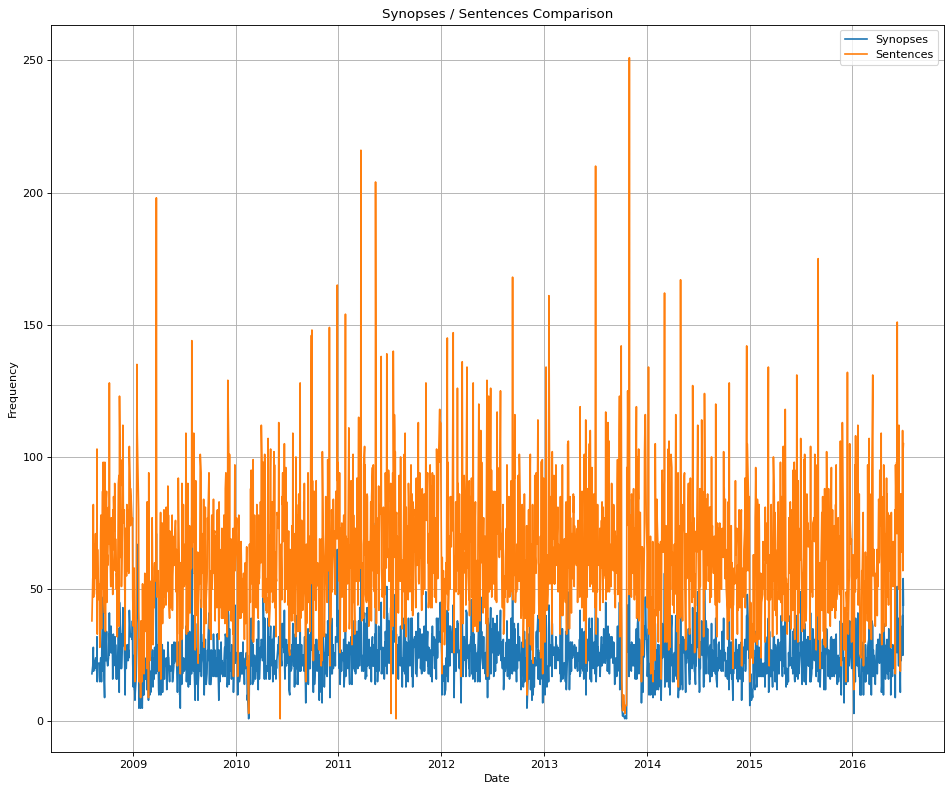

In [8]:
# Plotting count of Synopses compared to Sentences 
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df_text['date'], df_text['group_count'], label='Synopses')
plt.plot(df_text['date'], df_text['sent_count'], label='Sentences')
#plt.plot(ages_x, dev_y, label='All Devs')

plt.xlabel("Date")
plt.ylabel("Frequency")
plt.title("Synopses / Sentences Comparison")

plt.legend()
plt.grid()
plt.tight_layout()

In [ ]:
# # Example of using Max Column Width
# with pd.option_context('display.max_colwidth', -1):
#   display(df_text['synopsis'][0])

In [9]:
# Create an instance of English Stop Words and see how many there are in my set
stop_words = set(stopwords.words('english'))
stop_words.update(['rule', 'propose', 'ad', "regulation",
                   "Services", "Program", "Federal", "Office",
                   "result", "action", "Act", "comment"])
print(stop_words) # Set of stop words
print(len(stop_words)) # Number of stop words in my set

{'myself', 'this', 'who', 'which', 'the', 'while', 'only', 'too', 'once', 've', 'were', "it's", 'above', 'weren', 'action', 'having', 'i', "you'd", 'over', "you're", 'my', 'with', 'down', 'no', 'himself', 'its', 'doesn', 'their', 'it', 'ourselves', 'do', 'any', "shouldn't", 'whom', 'before', 'itself', 'how', 'at', 'nor', 'wasn', 'here', 'will', 'below', 'because', 'shouldn', "needn't", 't', 'rule', 'them', 'herself', 'other', "weren't", 'be', 'our', 'doing', 'or', "aren't", "that'll", 'through', 'mightn', 'more', 'from', 'his', 'hers', 'against', 'under', 'your', 'don', 'shan', "you've", 'can', 'are', 'ours', 'him', 'aren', 'yourself', 'than', 'o', 'very', 'yourselves', 'these', "haven't", 'we', 'during', 'an', 'ad', 'that', 'between', 'theirs', 'now', 'her', 'he', 'am', 'is', 'you', 'does', 'hadn', 'up', "wasn't", 'not', 'propose', 'until', 'y', 'ain', 'hasn', 'was', 'did', 'didn', 'needn', 'Program', 'when', "should've", 'of', 'been', "wouldn't", 'in', 's', 'they', 'then', "couldn't"

In [10]:
# Create a new column containing no stop words.
df_text['synopsis_no_stop'] = df_text['tokenized_synopsis'].swifter.apply(lambda x: [item for item in x if item not in stop_words])
df_text.head(1)

,date,synopsis,group_count,topic,agencies,text_url,tokenized_synopsis,sent_synopsis,sent_count,synopsis_no_stop
0,2008-08-08,This final rule updates the payment rates used...,18,Health facilities; Kidney diseases; Medicare; ...,Health and Human Services Department; Centers ...,https://www.federalregister.gov/documents/full...,"[This, final, rule, updates, the, payment, rat...",[This final rule updates the payment rates use...,38,"[This, final, updates, payment, rates, used, p..."


In [11]:
# Function to customize the is_punct
# Keep a reference to the original is_punct function
is_punct_original = EnglishDefaults.lex_attr_getters[IS_PUNCT]

def is_punct_custom(text):
    extra_punct = ["`", ">", "<", "$"]
    if text in extra_punct:
        return True
    return is_punct_original(text)

# Assign a new function for IS_PUNCT
EnglishDefaults.lex_attr_getters[IS_PUNCT] = is_punct_custom

In [12]:
# Lemmatization of the synopsis_no_stop column
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_synopsis(text):
    return [lemmatizer.lemmatize(w) for w in text]  #w_tokenizer.tokenize(text)]

df_text['synopsis_lem'] = df_text['synopsis_no_stop'].swifter.apply(lemmatize_synopsis)
df_text.head(1)

,date,synopsis,group_count,topic,agencies,text_url,tokenized_synopsis,sent_synopsis,sent_count,synopsis_no_stop,synopsis_lem
0,2008-08-08,This final rule updates the payment rates used...,18,Health facilities; Kidney diseases; Medicare; ...,Health and Human Services Department; Centers ...,https://www.federalregister.gov/documents/full...,"[This, final, rule, updates, the, payment, rat...",[This final rule updates the payment rates use...,38,"[This, final, updates, payment, rates, used, p...","[This, final, update, payment, rate, used, pro..."


In [14]:
nlp = spacy.load("en_core_web_sm")
nlp.Defaults.stop_words |= {"propose", "ad", "rule", "regulation", "Services",
                            "Program", "Federal", "Office", "result",
                            "action", "Act", "comment"}

In [15]:
# Using spaCy to process the text through its pipeline:
# The nlp call on text, spaCy first tokenizes the text to produce a Doc object.
# The Doc is then processed in several different steps – this is also referred to as the processing pipeline.
# The pipeline used by the default models consists of a tagger, a parser and an entity recognizer.

# Function to run spaCy
nlp = spacy.load("en_core_web_sm")
def synopsis_nlp(text):
  return nlp(text)

df_text['synopsis_nlp'] = df_text['synopsis'].swifter.apply(synopsis_nlp)
df_text.head(1)

,date,synopsis,group_count,topic,agencies,text_url,tokenized_synopsis,sent_synopsis,sent_count,synopsis_no_stop,synopsis_lem,synopsis_nlp
0,2008-08-08,This final rule updates the payment rates used...,18,Health facilities; Kidney diseases; Medicare; ...,Health and Human Services Department; Centers ...,https://www.federalregister.gov/documents/full...,"[This, final, rule, updates, the, payment, rat...",[This final rule updates the payment rates use...,38,"[This, final, updates, payment, rates, used, p...","[This, final, update, payment, rate, used, pro...","(This, final, rule, updates, the, payment, rat..."


In [16]:
def my_func(doc):
  return [token.lemma_ for token in doc if token.is_stop != True and token.is_punct != True]

# def my_func2(doc):
#   return [token.pos_ for token in doc if token.is_stop != True and token.is_punct != True]

df_text['synopsis_lem'] = df_text['synopsis_nlp'].swifter.apply(my_func)
df_text.head(1)

,date,synopsis,group_count,topic,agencies,text_url,tokenized_synopsis,sent_synopsis,sent_count,synopsis_no_stop,synopsis_lem,synopsis_nlp
0,2008-08-08,This final rule updates the payment rates used...,18,Health facilities; Kidney diseases; Medicare; ...,Health and Human Services Department; Centers ...,https://www.federalregister.gov/documents/full...,"[This, final, rule, updates, the, payment, rat...",[This final rule updates the payment rates use...,38,"[This, final, updates, payment, rates, used, p...","[final, update, payment, rate, prospective, pa...","(This, final, rule, updates, the, payment, rat..."


In [17]:
def word_counter(text):
  doc = nlp(','.join(text))
  count_words = [token.text for token in doc if not token.is_stop and not token.is_punct]
  word_freq = Counter(count_words)
  common_words = word_freq.most_common(5)
  return common_words

df_text['common_words'] = df_text['synopsis_lem'].swifter.apply(word_counter)
df_text

# doc = nlp(text)
# #remove stopwords and punctuations
# words = [token.text for token in doc if token.is_stop != True and token.is_punct != True]
# word_freq = Counter(words)
# common_words = word_freq.most_common(5)
# print (common_words)

,date,synopsis,group_count,topic,agencies,text_url,tokenized_synopsis,sent_synopsis,sent_count,synopsis_no_stop,synopsis_lem,synopsis_nlp,common_words
0,2008-08-08,This final rule updates the payment rates used...,18,Health facilities; Kidney diseases; Medicare; ...,Health and Human Services Department; Centers ...,https://www.federalregister.gov/documents/full...,"[This, final, rule, updates, the, payment, rat...",[This final rule updates the payment rates use...,38,"[This, final, updates, payment, rates, used, p...","[final, update, payment, rate, prospective, pa...","(This, final, rule, updates, the, payment, rat...","[(Services, 10), (Program, 9), (General, 9), (..."
1,2008-08-11,General Services Acquisition Regulation; GSAR ...,21,Income taxes; Reporting and recordkeeping requ...,General Services Administration;Health and Hum...,https://www.federalregister.gov/documents/full...,"[General, Services, Acquisition, Regulation, ;...",[General Services Acquisition Regulation; GSAR...,54,"[General, Acquisition, Regulation, ;, GSAR, Ca...","[General, Services, Acquisition, GSAR, Case, 2...","(General, Services, Acquisition, Regulation, ;...","[(new, 11), (airworthiness, 10), (issue, 10), ..."
2,2008-08-12,"We, the U.S. Fish and Wildlife Service (Servic...",25,Administrative practice and procedure; Flood i...,Interior Department; Fish and Wildlife Service...,https://www.federalregister.gov/documents/full...,"[We, ,, the, U.S, ., Fish, and, Wildlife, Serv...","[We, the U.S., Fish and Wildlife Service (Serv...",53,"[We, ,, U.S, ., Fish, Wildlife, Service, (, Se...","[U.S., Fish, Wildlife, Service, Service, annou...","(We, ,, the, U.S., Fish, and, Wildlife, Servic...","[(Federal, 19), (Defense, 18), (Acquisition, 1..."
3,2008-08-13,The General Services Administration (GSA) is p...,28,Grant programs-health; Health facilities; Heal...,General Services Administration;Health and Hum...,https://www.federalregister.gov/documents/full...,"[The, General, Services, Administration, (, GS...",[The General Services Administration (GSA) is ...,82,"[The, General, Administration, (, GSA, ), prop...","[General, Services, Administration, GSA, propo...","(The, General, Services, Administration, (, GS...","[(Federal, 13), (Act, 13), (require, 12), (tol..."
4,2008-08-14,"We, the U.S. Fish and Wildlife Service (we or ...",19,Freedom of information; Reporting and recordke...,Interior Department; Fish and Wildlife Service...,https://www.federalregister.gov/documents/full...,"[We, ,, the, U.S, ., Fish, and, Wildlife, Serv...","[We, the U.S., Fish and Wildlife Service (we o...",47,"[We, ,, U.S, ., Fish, Wildlife, Service, (, us...","[U.S., Fish, Wildlife, Service, announce, avai...","(We, ,, the, U.S., Fish, and, Wildlife, Servic...","[(Office, 13), (Department, 13), (Arizona, 11)..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,2016-06-27,The Coast Guard announces a public meeting to ...,31,Brokers; Reporting and recordkeeping requireme...,Homeland Security Department; Coast Guard;Secu...,https://www.federalregister.gov/documents/full...,"[The, Coast, Guard, announces, a, public, meet...",[The Coast Guard announces a public meeting to...,70,"[The, Coast, Guard, announces, public, meeting...","[Coast, Guard, announce, public, meeting, rece...","(The, Coast, Guard, announces, a, public, meet...","[(Act, 22), (area, 17), (requirement, 16), (EP..."
1970,2016-06-28,The Coast Guard proposes to establish a tempor...,40,Harbors; Marine safety; Navigation (water); Re...,Homeland Security Department; Coast Guard;Inte...,https://www.federalregister.gov/documents/full...,"[The, Coast, Guard, proposes, to, establish, a...",[The Coast Guard proposes to establish a tempo...,110,"[The, Coast, Guard, proposes, establish, tempo...","[Coast, Guard, propose, establish, temporary, ...","(The, Coast, Guard, proposes, to, establish, a...","[(Act, 30), (CSAPR, 29), (SIP, 28), (EPA, 27),..."
1971,2016-06-29,"In January 2011, NMFS implemented the trawl ra...",25,Fish

In [18]:
# Look at unique Agencies
agency_list = []
for i in df_text['agencies']:
  for a in i.split(';'):
    if a not in agency_list:
      agency_list.append(a)
print(agency_list)
print(f"Total Agencies: {len(agency_list)}")

['Health and Human Services Department', ' Centers for Medicare & Medicaid Services', 'Federal Communications Commission', 'General Services Administration', 'Interior Department', ' National Park Service', ' Surface Mining Reclamation and Enforcement Office', 'Nuclear Regulatory Commission', ' Children and Families Administration', 'Homeland Security Department', ' Coast Guard', 'Federal Reserve System', 'Agriculture Department', ' Food and Nutrition Service', 'Environmental Protection Agency', 'Treasury Department', ' Internal Revenue Service', 'Commerce Department', ' National Oceanic and Atmospheric Administration', 'Transportation Department', ' Federal Aviation Administration', ' Census Bureau', 'Personnel Management Office', ' Comptroller of the Currency', 'National Foundation on the Arts and the Humanities', ' Federal Transit Administration', ' Fish and Wildlife Service', ' Federal Railroad Administration', ' Federal Emergency Management Agency', ' Alcohol and Tobacco Tax and T

In [19]:
# # Count agencies in each cell
agencies_count = []
y = df_text['agencies'].str.split(';').swifter.apply(set)
for ag in y:
  len_set = len(ag)
  agencies_count.append(len_set)

df_text["agency_count"] = agencies_count
df_text.head(1)

,date,synopsis,group_count,topic,agencies,text_url,tokenized_synopsis,sent_synopsis,sent_count,synopsis_no_stop,synopsis_lem,synopsis_nlp,common_words,agency_count
0,2008-08-08,This final rule updates the payment rates used...,18,Health facilities; Kidney diseases; Medicare; ...,Health and Human Services Department; Centers ...,https://www.federalregister.gov/documents/full...,"[This, final, rule, updates, the, payment, rat...",[This final rule updates the payment rates use...,38,"[This, final, updates, payment, rates, used, p...","[final, update, payment, rate, prospective, pa...","(This, final, rule, updates, the, payment, rat...","[(Services, 10), (Program, 9), (General, 9), (...",15


In [20]:
df_text['agency_no_dups'] = df_text['agencies'].str.split(';').apply(set)
df_text.head(1)

,date,synopsis,group_count,topic,agencies,text_url,tokenized_synopsis,sent_synopsis,sent_count,synopsis_no_stop,synopsis_lem,synopsis_nlp,common_words,agency_count,agency_no_dups
0,2008-08-08,This final rule updates the payment rates used...,18,Health facilities; Kidney diseases; Medicare; ...,Health and Human Services Department; Centers ...,https://www.federalregister.gov/documents/full...,"[This, final, rule, updates, the, payment, rat...",[This final rule updates the payment rates use...,38,"[This, final, updates, payment, rates, used, p...","[final, update, payment, rate, prospective, pa...","(This, final, rule, updates, the, payment, rat...","[(Services, 10), (Program, 9), (General, 9), (...",15,"{ National Park Service, Homeland Security Dep..."


In [ ]:
# df_text.to_csv('df_text_8-03.csv')

In [21]:
with pd.option_context('display.max_colwidth', -1):
  display(df_text['common_words'])

0       [(Services, 10), (Program, 9), (General, 9), (final, 7), (request, 7)]          
1       [(new, 11), (airworthiness, 10), (issue, 10), (require, 9), (fuel, 9)]          
2       [(Federal, 19), (Defense, 18), (Acquisition, 15), (Flood, 14), (Supplement, 14)]
3       [(Federal, 13), (Act, 13), (require, 12), (tolerance, 12), (certain, 12)]       
4       [(Office, 13), (Department, 13), (Arizona, 11), (Act, 10), (area, 9)]           
                                        ...                                             
1969    [(Act, 22), (area, 17), (requirement, 16), (EPA, 16), (Federal, 15)]            
1970    [(Act, 30), (CSAPR, 29), (SIP, 28), (EPA, 27), (Federal, 23)]                   
1971    [(Federal, 17), (safety, 14), (SIP, 12), (Kansas, 12), (allocation, 12)]        
1972    [(safety, 52), (Federal, 42), (zone, 37), (Act, 24), (Ohio, 24)]                
1973    [(penalty, 43), (Federal, 38), (Civil, 37), (Inflation, 32), (Adjustment, 32)]  
Name: common_words, L

In [24]:
common_word_list = set([])
for r in df_text['common_words']:
  for word in r:
    common_word_list.add(word[0])
common_word_list

{',Petersburg',
 'AK',
 'AR',
 'ATS',
 'Acquisition',
 'Act',
 'Adjustment',
 'Age',
 'Agency',
 'Agenda',
 'Air',
 'Airbus',
 'Airport',
 'Airspace',
 'Airworthiness',
 'Alaska',
 'Aleutian',
 'Area',
 'Area,1a',
 'Areas',
 'Arizona',
 'Arkansas',
 'Asbestos',
 'Association',
 'Atlanta',
 'Atlantic',
 'BFT',
 'BSAI',
 'Banks',
 'Bay',
 'Bell',
 'Bering',
 'Board',
 'Boeing',
 'Boston',
 'Bridge',
 'Broadcasting',
 'Bureau',
 'Business',
 'C',
 'CAIR',
 'CBP',
 'CO',
 'CSAPR',
 'CTS',
 'Calcasieu',
 'California',
 'Capital',
 'Captain',
 'Care',
 'Carolina',
 'Central',
 'Chattanooga',
 'Chicago',
 'Choice',
 'City',
 'Civil',
 'Class',
 'Coast',
 'Colorado',
 'Columbus',
 'Commercial',
 'Commission',
 'Committee',
 'Community',
 'Compensation',
 'Conneaut',
 'Control',
 'Convention',
 'Cotton',
 'Coulee',
 'Council',
 'Counties',
 'County',
 'Creek',
 'Crop',
 'Cuba',
 'Cumberland',
 'DC',
 'DEA',
 'DFARS',
 'DHS',
 'DOE',
 'DOL',
 'DPS',
 'Dairy',
 'Defense',
 'Delaware',
 'Departmen

In [ ]:
# df_text['common_words'].value_counts()

In [ ]:
# def commom_words(n=15):
#   '''Plot most common word frequency using matplotlib'''
#   figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
#   #plt.xkcd()
#   plt.style.use('seaborn-dark')
#   c = Counter()
#   for w in count_words:
#     c.update(w.split(","))
#   x, y = [], []
#   c = c.most_common(n)
#   for i in c:
#     x.append(i[0])
#     y.append(i[1])
#   x.reverse()
#   y.reverse()
#   plt.barh(x,y)
#   plt.title('Most Common Words')
#   plt.xlabel('Number of Words')
#   plt.ylabel('Word')
#   plt.tight_layout()
#   plt.show()
#   plt.savefig('gov_words_plot')
#   plt.rcdefaults()

# commom_words(10)

In [25]:
# DJIA companies showing up in the documents
df_text[df_text['synopsis'].str.contains('Microsoft')]

,date,synopsis,group_count,topic,agencies,text_url,tokenized_synopsis,sent_synopsis,sent_count,synopsis_no_stop,synopsis_lem,synopsis_nlp,common_words,agency_count,agency_no_dups
976,2012-07-03,"The Federal Aviation Administration (FAA), U.S...",39,Air pollution control; Environmental protectio...,Transportation Department; Federal Aviation Ad...,https://www.federalregister.gov/documents/full...,"[The, Federal, Aviation, Administration, (, FA...","[The Federal Aviation Administration (FAA), U....",87,"[The, Aviation, Administration, (, FAA, ), ,, ...","[Federal, Aviation, Administration, FAA, U.S.,...","(The, Federal, Aviation, Administration, (, FA...","[(safety, 32), (zone, 32), (vessel, 27), (temp...",21,"{Environmental Protection Agency, State Depart..."
1875,2016-02-12,This final rule requires providers and supplie...,21,Administrative practice and procedure; Claims;...,Health and Human Services Department; Centers ...,https://www.federalregister.gov/documents/full...,"[This, final, rule, requires, providers, and, ...",[This final rule requires providers and suppli...,50,"[This, final, requires, providers, suppliers, ...","[final, require, provider, supplier, receive, ...","(This, final, rule, requires, providers, and, ...","[(EPA, 14), (behalf, 13), (Federal, 12), (devi...",14,"{Homeland Security Department, Food and Drug ..."


In [ ]:
# cnt = Counter(df_text['agencies'])
# cnt
# #set(cnt.elements())

In [26]:
# Read in the DJIA data
df_djia = pd.read_csv('djia_all_8yr.csv')
df_djia

,date,label,open,high,low,close,volume,adj_close
0,2008-08-08,0,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1,2008-08-11,1,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
2,2008-08-12,0,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
3,2008-08-13,0,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
4,2008-08-14,1,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688
...,...,...,...,...,...,...,...,...
1984,2016-06-27,0,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234
1985,2016-06-28,1,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
1986,2016-06-29,1,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
1987,2016-06-30,1,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234


In [25]:
# Set date column as a DateTime object
df_djia['date'] = pd.to_datetime(df_djia['date'])
df_djia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1989 non-null   datetime64[ns]
 1   label      1989 non-null   int64         
 2   open       1989 non-null   float64       
 3   high       1989 non-null   float64       
 4   low        1989 non-null   float64       
 5   close      1989 non-null   float64       
 6   volume     1989 non-null   int64         
 7   adj_close  1989 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 124.4 KB


In [ ]:
#daily_stock_change = []
def stock_change(row):
  close = row['adj_close']
  open = row['open']
  e = (close - open) / open
  if e < -0.02:              #< 0.0: # market drop
    val = 0
#    print(e)
  elif (e >= -0.02) and (e <= -0.01):
    val = 1
#    print(e)
  elif (e >= -0.01) and (e <= 0.0):
    val = 2
#    print(e)
  elif (e > 0.0) and (e <= 0.01): # Greater than zero and less than 5% gain
    val = 3
#    print(e)
  elif (e > 0.01) and (e <= 0.02): # Greater than 5% and less than 10% gain
    val = 4
#    print(e)
  else: # Greater than 10% gain 
    val = 5
#    print(e)
  return val

In [ ]:
def b_stock_change(row):
  close = row['adj_close']
  open = row['open']
  e = (close - open) / open
  if e < 0.00: # market drop
    val = 0
#    print(e)
  else: # Greater than 10% gain 
    val = 1
#    print(e)
  return val

In [ ]:
df_djia['m_class'] = df_djia.swifter.apply(stock_change, axis=1)
df_djia['b_class'] = df_djia.swifter.apply(b_stock_change, axis=1)

In [ ]:
df_djia.head()

,date,label,open,high,low,close,volume,adj_close,m_class,b_class
0,2008-08-08,0,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,5,1
1,2008-08-11,1,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,3,1
2,2008-08-12,0,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,1,0
3,2008-08-13,0,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,2,0
4,2008-08-14,1,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,3,1


In [ ]:
df_djia['b_class'].value_counts(sort=False)

0     911
1    1078
Name: b_class, dtype: int64

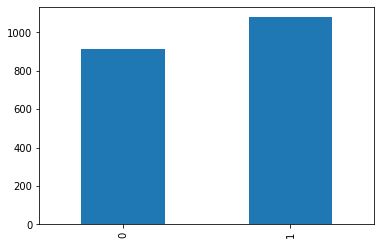

In [ ]:
df_djia['b_class'].value_counts().sort_index().plot.bar()

In [ ]:
df_djia['m_class'].value_counts(sort=False)

0     89
1    167
2    656
3    800
4    198
5     79
Name: m_class, dtype: int64

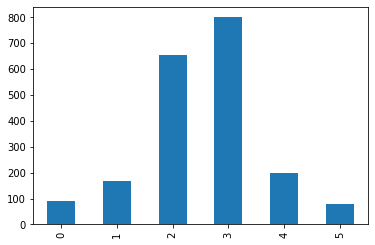

In [ ]:
df_djia['m_class'].value_counts().sort_index().plot.bar()

In [ ]:
# Set the date columns as index
# df_djia.set_index('date', inplace=True)
# df_text.set_index('date', inplace=True)

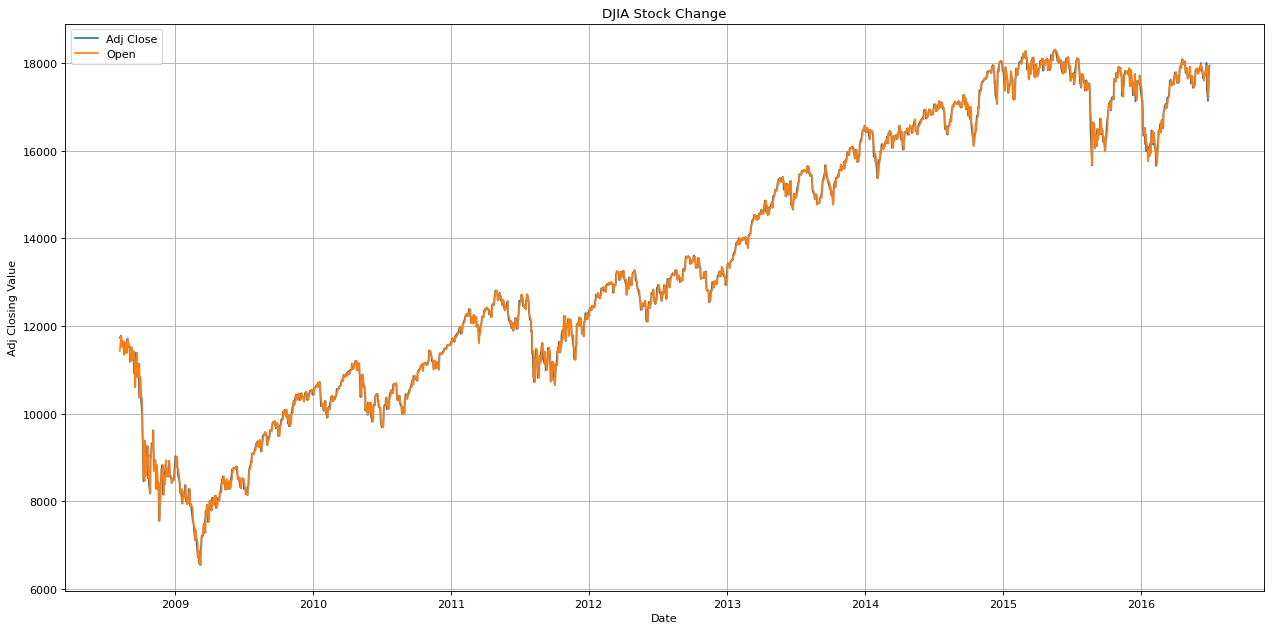

In [ ]:
figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df_djia['adj_close'], label='Adj Close')
plt.plot(df_djia['open'], label='Open')

# Plotting each individually
# df_djia['adj_close'].plot(figsize = (16,8))
# df_djia['open'].plot(figsize = (16,8))

plt.xlabel("Date")
plt.ylabel("Adj Closing Value")
plt.title("DJIA Stock Change")
plt.tight_layout()
plt.grid()
plt.legend()

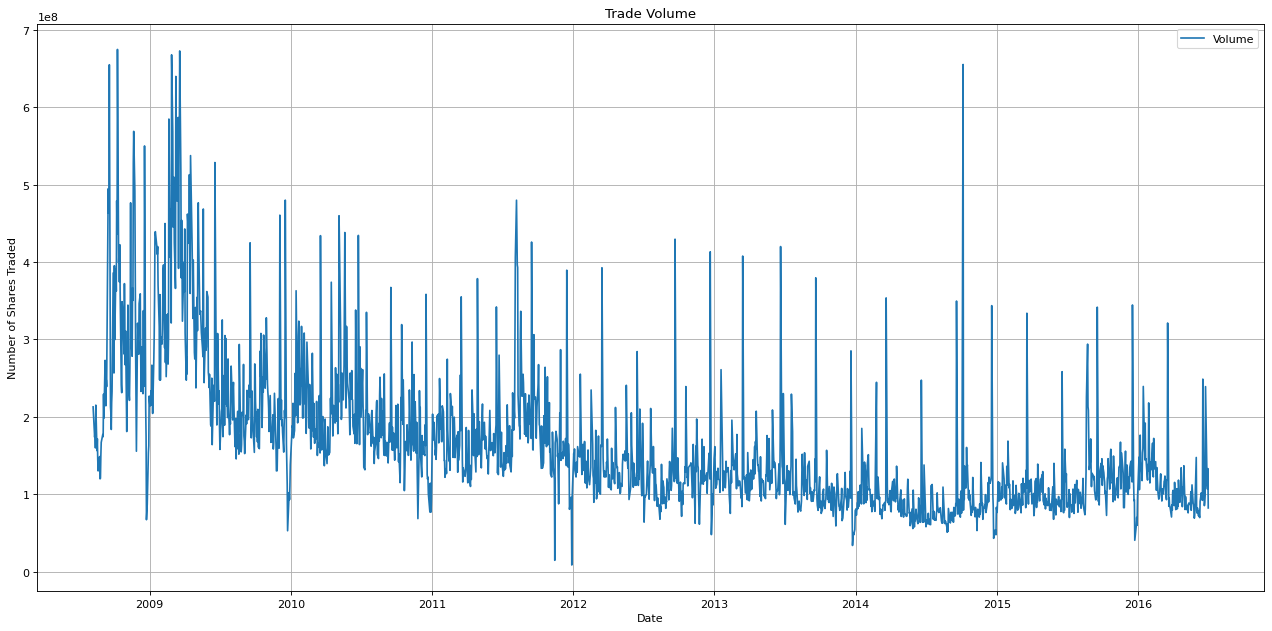

In [ ]:
# Plotting trade Volume
figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df_djia['volume'], label='Volume')
plt.xlabel("Date")
plt.ylabel("Number of Shares Traded")
plt.title("Trade Volume")
plt.tight_layout()
plt.grid()
plt.legend()
plt.show()

In [ ]:
df_text_merge = df_text.drop(['tokenized_synopsis', 'topic',
                              'agencies', 'text_url', 'sent_synopsis',
                              'synopsis_no_stop', 'synopsis_nlp', 'common_words'], 1)
df_text_merge.head()

,synopsis,group_count,sent_count,synopsis_lem,agency_count,agency_no_dups
date,,,,,,
2008-08-08,This final rule updates the payment rates used...,18,38,"[final, rule, update, payment, rate, prospecti...",15,"{Environmental Protection Agency, Federal Rese..."
2008-08-11,General Services Acquisition Regulation; GSAR ...,21,54,"[General, Services, Acquisition, Regulation, G...",15,{ National Oceanic and Atmospheric Administrat...
2008-08-12,"We, the U.S. Fish and Wildlife Service (Servic...",25,53,"[U.S., Fish, Wildlife, Service, Service, annou...",16,{ National Oceanic and Atmospheric Administrat...
2008-08-13,The General Services Administration (GSA) is p...,28,82,"[General, Services, Administration, GSA, propo...",21,"{ Centers for Medicare & Medicaid Services, Ge..."
2008-08-14,"We, the U.S. Fish and Wildlife Service (we or ...",19,47,"[U.S., Fish, Wildlife, Service, announce, avai...",19,"{ Employment and Training Administration, Labo..."


In [ ]:
# model_data = pd.read_csv("df_text_8-03.csv")
# model_data

In [ ]:
# model_data = df_text.drop(['tokenized_synopsis', 'topic',
#                               'agencies', 'text_url', 'sent_synopsis',
#                               'synopsis_no_stop', 'synopsis_nlp', 'common_words'], 1)
# model_data.head()

In [ ]:
df_djia_merge = df_djia.drop(['label', 'open', 'high',
                              'low', 'close', 'volume',
                              'adj_close'], 1)
df_djia_merge.head()

,m_class,b_class
date,,
2008-08-08,5,1
2008-08-11,3,1
2008-08-12,1,0
2008-08-13,2,0
2008-08-14,3,1


In [ ]:
df_merge = pd.merge(df_djia_merge, df_text_merge, how='inner', left_index=True, right_index=True)
df_merge

,m_class,b_class,synopsis,group_count,sent_count,synopsis_lem,agency_count,agency_no_dups
date,,,,,,,,
2008-08-08,5,1,This final rule updates the payment rates used...,18,38,"[final, rule, update, payment, rate, prospecti...",15,"{Environmental Protection Agency, Federal Rese..."
2008-08-11,3,1,General Services Acquisition Regulation; GSAR ...,21,54,"[General, Services, Acquisition, Regulation, G...",15,{ National Oceanic and Atmospheric Administrat...
2008-08-12,1,0,"We, the U.S. Fish and Wildlife Service (Servic...",25,53,"[U.S., Fish, Wildlife, Service, Service, annou...",16,{ National Oceanic and Atmospheric Administrat...
2008-08-13,2,0,The General Services Administration (GSA) is p...,28,82,"[General, Services, Administration, GSA, propo...",21,"{ Centers for Medicare & Medicaid Services, Ge..."
2008-08-14,3,1,"We, the U.S. Fish and Wildlife Service (we or ...",19,47,"[U.S., Fish, Wildlife, Service, announce, avai...",19,"{ Employment and Training Administration, Labo..."
...,...,...,...,...,...,...,...,...
2016-06-27,1,0,The Coast Guard announces a public meeting to ...,31,70,"[Coast, Guard, announce, public, meeting, rece...",24,"{ Office of the Secretary, Energy Department, ..."
2016-06-28,4,1,The Coast Guard proposes to establish a tempor...,40,110,"[Coast, Guard, propose, establish, temporary, ...",26,"{ Office of the Secretary, Energy Department, ..."
2016-06-29,4,1,"In January 2011, NMFS implemented the trawl ra...",25,57,"[January, 2011, NMFS, implement, trawl, ration...",18,"{Environmental Protection Agency, National Oc..."


In [ ]:
df_merge.columns.to_list()

NameError: ignored

In [ ]:
# words_for_model = []
# def docs_prep(text):
#   for row in text:
#     for i in row:
#       words_for_model.append(str(i))
#       return words_for_model

# df_merge['docs_for_model'] = df_merge['synopsis_lem'].swifter.apply(docs_prep)
# df_text_merge.head(1)

In [ ]:
print(len(df_merge['synopsis_lem']))

1964


In [ ]:
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

X = df_merge[['agency_count', 'sent_count', 'group_count']]
y = df_merge['m_class']

# Step2: Split the training test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Step 4: Fit a Random Forest model, " compared to "Decision Tree model
rc_clf = RandomForestClassifier()
rc_clf.fit(X_train, y_train)
predictions = rc_clf.predict(X_test)

accuracy_score(y_test, predictions)
confusion_matrix(y_test, predictions)

array([[  1,   2,  12,  20,   0,   0],
       [  1,   1,  26,  26,   5,   0],
       [  2,   5,  76, 100,  12,   1],
       [  4,   9,  96, 141,  11,   7],
       [  0,   0,  25,  41,   1,   0],
       [  0,   1,  11,   9,   3,   0]])

In [ ]:
# TF-IDF Vectorizer
def identity_tokenizer(text):
    return text

feature_extraction = TfidfVectorizer(tokenizer=identity_tokenizer, lowercase=False)
X = feature_extraction.fit_transform(df_merge['synopsis_lem'][0:1000,])

# target and features
y = df_merge['m_class'][0:1000,]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# train classifier
clf = SVC(probability=True, kernel='rbf')
clf.fit(X_train, y_train)

# predict and evaluate predictions
labels = range(6) #X.shape[1])
predictions = clf.predict_proba(X_test)
print('ROC-AUC score ' + str(roc_auc_score(y_test, predictions, average='macro', sample_weight=None, max_fpr=1.0,
                                           multi_class='ovr', labels=labels)))

ROC-AUC score 0.567059732294167


In [ ]:
print(__doc__)

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5])
n_classes = 6

# # Add noisy features to make the problem harder
# random_state = np.random.RandomState(0)
# n_samples, n_features = X.shape
# X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# # shuffle and split training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
#                                                     random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

Automatically created module for IPython interactive environment


ValueError: ignored

In [ ]:
y_test

963     3
1138    3
1471    3
496     2
1407    1
       ..
738     2
1100    3
1845    2
100     4
1718    2
Name: target, Length: 652, dtype: int64

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

KeyError: ignored

<Figure size 432x288 with 0 Axes>

In [ ]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

KeyError: ignored

The sklearn.metrics.roc_auc_score function can be used for multi-class classification. The multi-class One-vs-One scheme compares every unique pairwise combination of classes. In this section, we calculate the AUC using the OvR and OvO schemes. We report a macro average, and a prevalence-weighted average.

In [ ]:
y_prob = classifier.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

ValueError: ignored

In [ ]:
X.shape[0]

1964

In [ ]:
y.shape[0]

1974

In [ ]:
len(predictions)

649

In [ ]:
predictions[:,1]

array([0.5673318 , 0.55576677, 0.52865891, 0.61623316, 0.5795228 ,
       0.5510287 , 0.50794424, 0.56633166, 0.5766755 , 0.57302302,
       0.53474096, 0.56414122, 0.5       , 0.53775916, 0.60003685,
       0.59765307, 0.56452192, 0.55722798, 0.5181743 , 0.55590221,
       0.52279447, 0.53880253, 0.52796434, 0.58576433, 0.53480823,
       0.61342255, 0.54972708, 0.54095941, 0.60980257, 0.58107688,
       0.56742495, 0.50541698, 0.53614811, 0.56086917, 0.60704709,
       0.61152925, 0.55987739, 0.48303502, 0.53736912, 0.62627577,
       0.61759005, 0.56008846, 0.59695557, 0.48266337, 0.53114855,
       0.5283554 , 0.56939036, 0.57567685, 0.54981988, 0.59739781,
       0.56240003, 0.51907571, 0.60156452, 0.56787409, 0.55877084,
       0.61916548, 0.53163128, 0.552311  , 0.48639727, 0.52683517,
       0.59308429, 0.54592063, 0.53330895, 0.53569196, 0.58415601,
       0.55802945, 0.54819395, 0.56490662, 0.5197679 , 0.53886346,
       0.57018258, 0.60505578, 0.55598199, 0.59603842, 0.58694

In [ ]:
# Retrieve documents from Federal Registry
# Establish start and end dates for the range of documents
start_date = '2020-08-12'
end_date = '2020-08-12'

# Create date objects for comparisons
start_date_dobj = parser.parse(start_date)
end_date_dobj = parser.parse(end_date)

# Establish a max number of data retrievals
n = 1
# Get data and save each retrieval to a .csv file
while (start_date_dobj == end_date_dobj) and (n == 1):
  print(f"Getting data for: {end_date}")
  print(f"Get attempt: {n}")
  final_url = f'https://www.federalregister.gov/api/v1/documents.csv?fields%5B%5D=abstract&fields%5B%5D=agency_names&fields%5B%5D=publication_date&fields%5B%5D=raw_text_url&fields%5B%5D=title&fields%5B%5D=topics&per_page=1000&conditions%5Bpublication_date%5D%5Bgte%5D={start_date}&conditions%5Bpublication_date%5D%5Blte%5D={end_date}&conditions%5Btype%5D%5B%5D=RULE&conditions%5Btype%5D%5B%5D=PRORULE'
  get_data = pd.read_csv(final_url)
  get_data.to_csv(f'{end_date}.csv')
  end_date_raw = get_data['publication_date'].iloc[-1]
  end_date = parser.parse(end_date_raw).strftime('%Y-%m-%d')
  end_date_dobj = parser.parse(end_date)
  n += 1
  time.sleep(5)

Getting data for: 2020-08-12
Get attempt: 1


In [ ]:
new_data = pd.read_csv('2020-08-12.csv')
new_data

,Unnamed: 0,abstract,agency_names,publication_date,raw_text_url,title,topics
0,0,These special conditions are issued for the Bo...,Transportation Department; Federal Aviation Ad...,08/12/2020,https://www.federalregister.gov/documents/full...,Special Conditions: Aerospace Design and Compl...,Aircraft; Aviation safety; Reporting and recor...
1,1,These special conditions are issued for the Le...,Transportation Department; Federal Aviation Ad...,08/12/2020,https://www.federalregister.gov/documents/full...,Special Conditions: Leonardo S.p.A. (Leonardo)...,Aircraft; Aviation safety; Reporting and recor...
2,2,"The Food and Drug Administration (FDA, we, or ...",Health and Human Services Department; Food and...,08/12/2020,https://www.federalregister.gov/documents/full...,Food Additives Permitted in Feed and Drinking ...,Animal feeds; Food additives
3,3,This document contains corrections to final re...,Treasury Department; Internal Revenue Service,08/12/2020,https://www.federalregister.gov/documents/full...,Rules Regarding Certain Hybrid Arrangements; C...,Income taxes; Reporting and recordkeeping requ...
4,4,This regulation establishes tolerances for res...,Environmental Protection Agency,08/12/2020,https://www.federalregister.gov/documents/full...,Nitrapyrin; Pesticide Tolerances,Administrative practice and procedure; Agricul...
5,5,This regulation establishes tolerances for res...,Environmental Protection Agency,08/12/2020,https://www.federalregister.gov/documents/full...,Pethoxamid; Pesticide Tolerances,Administrative practice and procedure; Agricul...
6,6,The Mid-Atlantic Fishery Management Council ha...,Commerce Department; National Oceanic and Atmo...,08/12/2020,https://www.federalregister.gov/documents/full...,Magnuson-Stevens Fishery Conservation and Mana...,Fisheries; Fishing; Reporting and recordkeepin...
7,7,This proposed rule would revise the Medicare h...,Health and Human Services Department; Centers ...,08/12/2020,https://www.federalregister.gov/documents/full...,Medicare Program: Hospital Outpatient Prospect...,Administrative practice and procedure; Biologi...
8,8,This action finalizes the residual risk and te...,Environmental Protection Agency,08/12/2020,https://www.federalregister.gov/documents/full...,National Emission Standards for Hazardous Air ...,Administrative practice and procedure; Air pol...
9,9,Pursuant to the federal Clean Air Act (CAA or ...,Environmental Protection Agency,08/12/2020,https://www.federalregister.gov/documents/full...,Promulgation of Air Quality Implementation Pla...,Administrative practice and procedure; Air pol...


In [ ]:
for d in range(3):
  print(d)

0
1
2


In [ ]:
predictions

array([[0.4326682 , 0.5673318 ],
       [0.44423323, 0.55576677],
       [0.47134109, 0.52865891],
       ...,
       [0.42649934, 0.57350066],
       [0.4067953 , 0.5932047 ],
       [0.38604679, 0.61395321]])